In [81]:
#importing libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import random

In [82]:
#extracting raw data and converting into Data Frame
df = pd.read_csv("./Data/data.csv")
df = pd.DataFrame(df)
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
#checking df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [77]:
#checking first 20 columns correlation
#df1 = df.iloc[:, np.r_[0:20]]
#df1.info()

In [78]:
#sns.set(rc={'figure.figsize':(15,10)})
#sns.heatmap(df1.corr(), annot=True)


In [5]:
#checking how much 0 and 1
count_no_sub = len(df[df['Bankrupt?']==0])
count_sub = len(df[df['Bankrupt?']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 96.77372048687491
percentage of subscription 3.2262795131250916


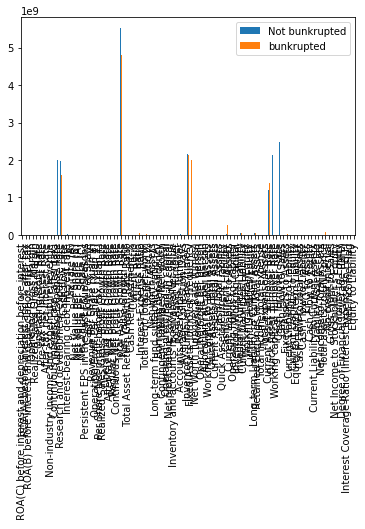

In [6]:
#graph with mean
df_mean = df.groupby('Bankrupt?').mean()
not_bunkr = df_mean.iloc[0]
bunkr = df_mean.iloc[1]
index = df_mean.columns
df_graph = pd.DataFrame({'Not bunkrupted': not_bunkr, 'bunkrupted': bunkr }, index=index)
ax = df_graph.plot(kind="bar")

In [83]:
#detecting and saving high correleted features
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]
high_corr_clm = [' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 ' Liability to Equity']

In [84]:
#dropping high correleted features
df.drop(high_corr_clm, axis=1, inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 77 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    Operating Gross Margin                                   6819 non-null   float64
 3    Operating Profit Rate                                    6819 non-null   float64
 4    Non-industry income and expenditure/revenue              6819 non-null   float64
 5    Operating Expense Rate                                   6819 non-null   float64
 6    Research and development expense rate                    6819 non-null   float64
 7    Cash flow rate                                           6819 non-null   float64
 8    Interest-bearing 

In [82]:
#breacking df into smaller parts
df1 = df.iloc[:, np.r_[0:15]]
df2 = df.iloc[:, np.r_[16:30]]
df3 = df.iloc[:, np.r_[31:45]]
df4 = df.iloc[:, np.r_[45:60]]
df5 = df.iloc[:, np.r_[61:75]]

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>],
       [<AxesSubplot:title={'center':' Non-industry income and expenditure/revenue'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubplot:title={'center':' Cash flow rate'}>],
       [<AxesSubplot:title={'center':' Interest-bearing debt interest rate'}>,
        <AxesSubplot:title={'center':' Tax rate (A)'}>,
        <AxesSubplot:title={'center':' Net Value Per Share (B)'}>,
        <AxesSubplot:title={'center':' Persistent EPS in the Last Four Seasons'}>],
       [<AxesSubplot:title={'center':' Cash Flow Per Share'}>,
        <AxesSubplot:title={'center':' Revenue Per Share (Yuan ¥)'}>,
     

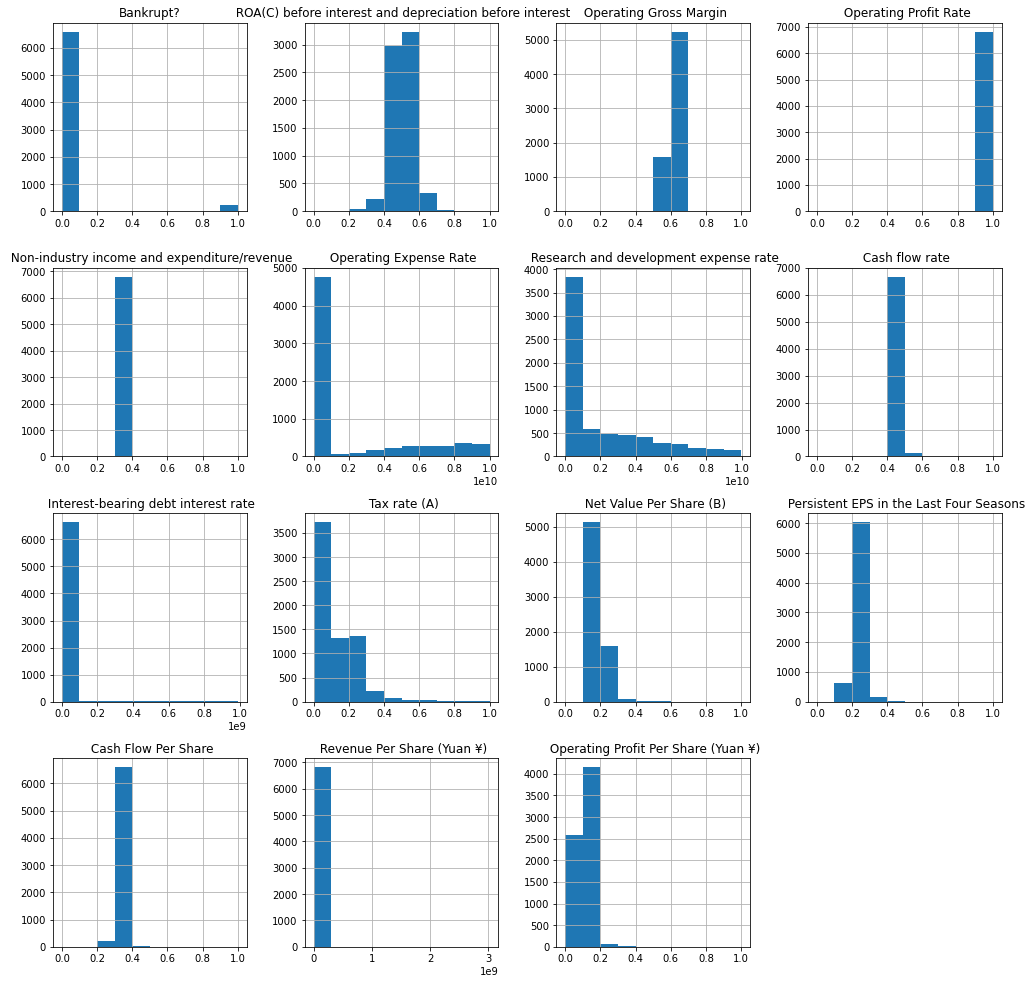

In [84]:
df1.hist(figsize=(17,17))

array([[<AxesSubplot:title={'center':' Operating Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' After-tax Net Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' Continuous Net Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' Total Asset Growth Rate'}>],
       [<AxesSubplot:title={'center':' Net Value Growth Rate'}>,
        <AxesSubplot:title={'center':' Total Asset Return Growth Rate Ratio'}>,
        <AxesSubplot:title={'center':' Cash Reinvestment %'}>,
        <AxesSubplot:title={'center':' Current Ratio'}>],
       [<AxesSubplot:title={'center':' Quick Ratio'}>,
        <AxesSubplot:title={'center':' Interest Expense Ratio'}>,
        <AxesSubplot:title={'center':' Total debt/Total net worth'}>,
        <AxesSubplot:title={'center':' Debt ratio %'}>],
       [<AxesSubplot:title={'center':' Long-term fund suitability ratio (A)'}>,
        <AxesSubplot:title={'center':' Borrowing dependency'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=o

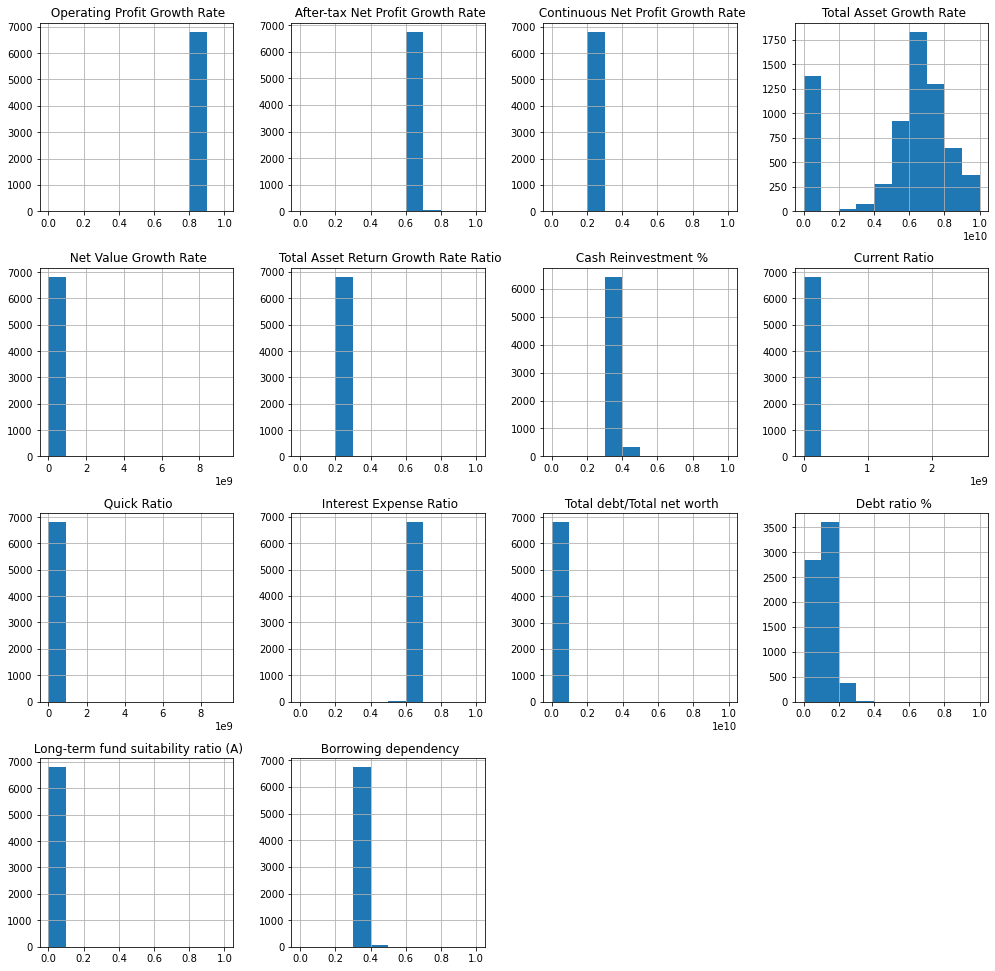

In [85]:
df2.hist(figsize=(17,17))

array([[<AxesSubplot:title={'center':' Inventory and accounts receivable/Net value'}>,
        <AxesSubplot:title={'center':' Total Asset Turnover'}>,
        <AxesSubplot:title={'center':' Accounts Receivable Turnover'}>,
        <AxesSubplot:title={'center':' Average Collection Days'}>],
       [<AxesSubplot:title={'center':' Inventory Turnover Rate (times)'}>,
        <AxesSubplot:title={'center':' Fixed Assets Turnover Frequency'}>,
        <AxesSubplot:title={'center':' Net Worth Turnover Rate (times)'}>,
        <AxesSubplot:title={'center':' Revenue per person'}>],
       [<AxesSubplot:title={'center':' Operating profit per person'}>,
        <AxesSubplot:title={'center':' Allocation rate per person'}>,
        <AxesSubplot:title={'center':' Working Capital to Total Assets'}>,
        <AxesSubplot:title={'center':' Quick Assets/Total Assets'}>],
       [<AxesSubplot:title={'center':' Current Assets/Total Assets'}>,
        <AxesSubplot:title={'center':' Cash/Total Assets'}>,
   

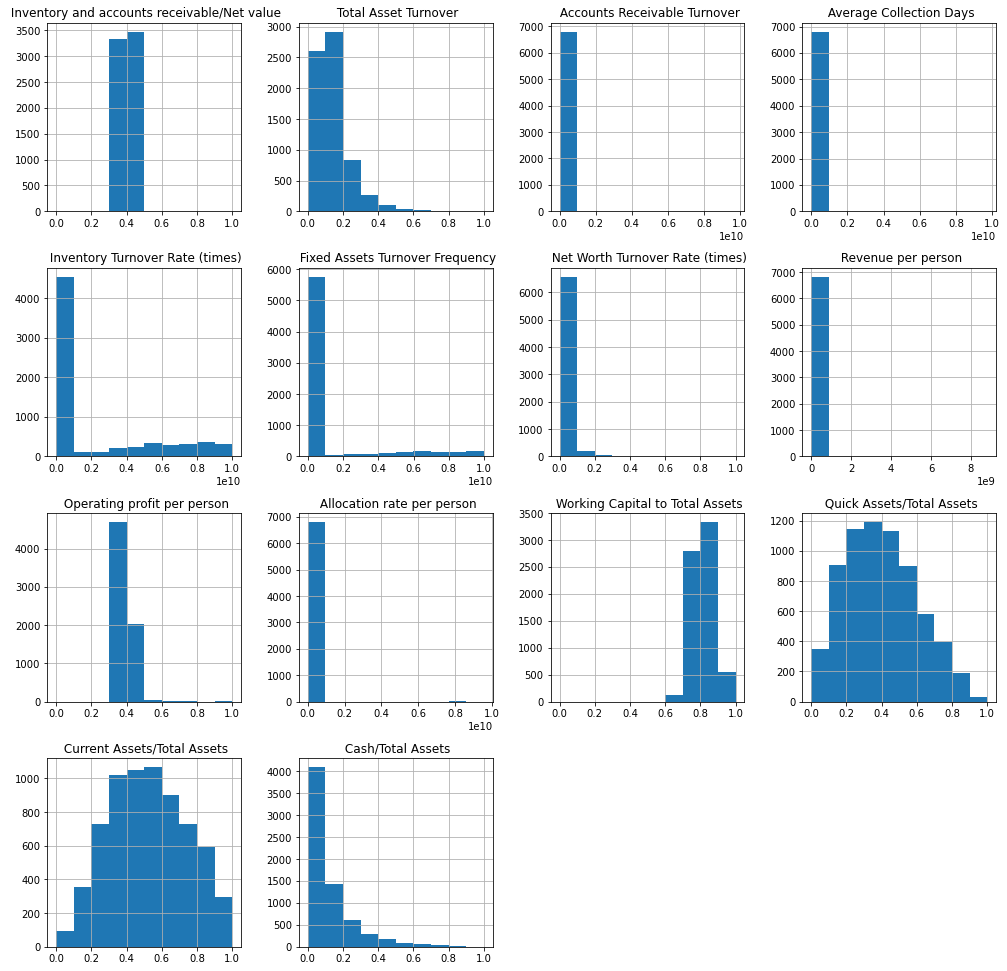

In [86]:
df3.hist(figsize=(17,17))

array([[<AxesSubplot:title={'center':' Quick Assets/Current Liability'}>,
        <AxesSubplot:title={'center':' Cash/Current Liability'}>,
        <AxesSubplot:title={'center':' Current Liability to Assets'}>,
        <AxesSubplot:title={'center':' Operating Funds to Liability'}>],
       [<AxesSubplot:title={'center':' Inventory/Working Capital'}>,
        <AxesSubplot:title={'center':' Inventory/Current Liability'}>,
        <AxesSubplot:title={'center':' Current Liabilities/Liability'}>,
        <AxesSubplot:title={'center':' Working Capital/Equity'}>],
       [<AxesSubplot:title={'center':' Current Liabilities/Equity'}>,
        <AxesSubplot:title={'center':' Long-term Liability to Current Assets'}>,
        <AxesSubplot:title={'center':' Retained Earnings to Total Assets'}>,
        <AxesSubplot:title={'center':' Total income/Total expense'}>],
       [<AxesSubplot:title={'center':' Total expense/Assets'}>,
        <AxesSubplot:title={'center':' Current Asset Turnover Rate'}>,
  

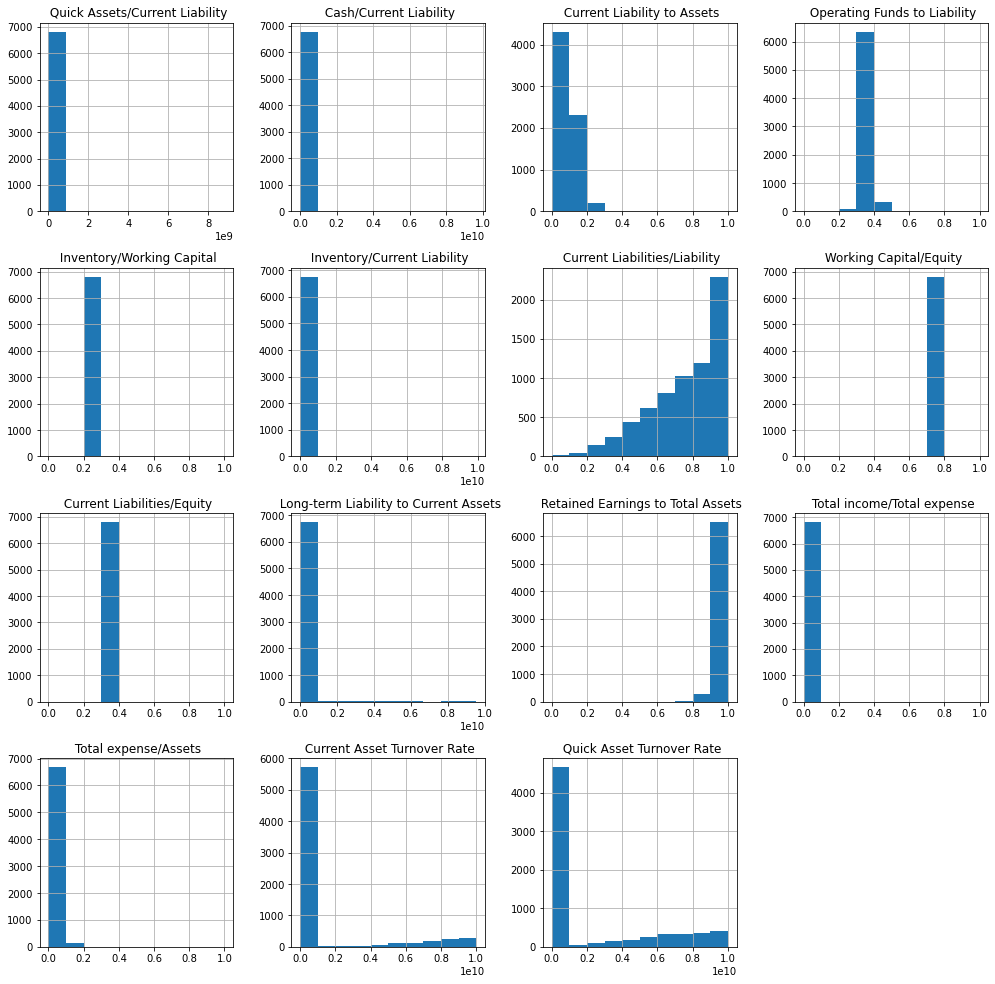

In [87]:
df4.hist(figsize=(17,17))

array([[<AxesSubplot:title={'center':' Cash Turnover Rate'}>,
        <AxesSubplot:title={'center':' Fixed Assets to Assets'}>,
        <AxesSubplot:title={'center':' Equity to Long-term Liability'}>,
        <AxesSubplot:title={'center':' Cash Flow to Total Assets'}>],
       [<AxesSubplot:title={'center':' Cash Flow to Liability'}>,
        <AxesSubplot:title={'center':' CFO to Assets'}>,
        <AxesSubplot:title={'center':' Cash Flow to Equity'}>,
        <AxesSubplot:title={'center':' Current Liability to Current Assets'}>],
       [<AxesSubplot:title={'center':' Liability-Assets Flag'}>,
        <AxesSubplot:title={'center':' Total assets to GNP price'}>,
        <AxesSubplot:title={'center':' No-credit Interval'}>,
        <AxesSubplot:title={'center':" Net Income to Stockholder's Equity"}>],
       [<AxesSubplot:title={'center':' Degree of Financial Leverage (DFL)'}>,
        <AxesSubplot:title={'center':' Interest Coverage Ratio (Interest expense to EBIT)'}>,
        <AxesSub

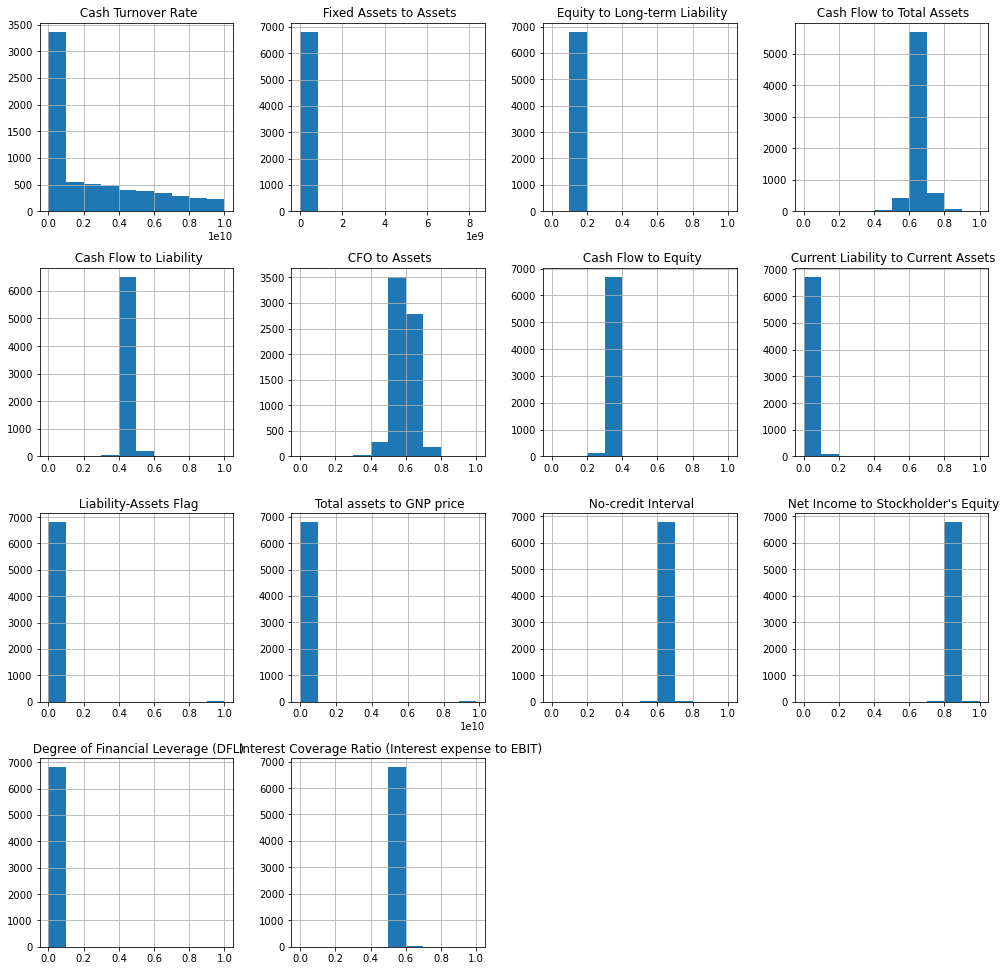

In [88]:
df5.hist(figsize=(17,17))

In [86]:
#manual checking unnecessary features for business profitability
unimport_ftrs = [' Operating Profit Rate',
                 ' Non-industry income and expenditure/revenue', 
                 ' Interest-bearing debt interest rate',
                 ' Revenue Per Share (Yuan ¥)',
                 ' Operating Profit Growth Rate',
                 ' Continuous Net Profit Growth Rate',
                 ' Net Value Growth Rate',
                 ' Total Asset Return Growth Rate Ratio',
                 ' Current Ratio',
                 ' Quick Ratio',
                 ' Total debt/Total net worth',
                 ' Long-term fund suitability ratio (A)',
                 ' Accounts Receivable Turnover',
                 ' Average Collection Days',
                 ' Revenue per person',
                 ' Allocation rate per person',
                 ' Quick Assets/Current Liability',
                 ' Cash/Current Liability',
                 ' Inventory/Working Capital',
                 ' Inventory/Current Liability',
                 ' Working Capital/Equity',
                 ' Current Liabilities/Equity',
                 ' Total income/Total expense',
                 ' Fixed Assets to Assets',
                 ' Equity to Long-term Liability',
                 ' Liability-Assets Flag',
                 ' Total assets to GNP price',
                 ' No-credit Interval',
                 ' Interest Coverage Ratio (Interest expense to EBIT)'
                                                                        ]

In [87]:
#dropping filteres features
df.drop(unimport_ftrs, axis=1, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 48 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    Operating Gross Margin                                   6819 non-null   float64
 3    Operating Expense Rate                                   6819 non-null   float64
 4    Research and development expense rate                    6819 non-null   float64
 5    Cash flow rate                                           6819 non-null   float64
 6    Tax rate (A)                                             6819 non-null   float64
 7    Net Value Per Share (B)                                  6819 non-null   float64
 8    Persistent EPS in

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' ROA(C) before interest and depreciation before interest'}>,
        <AxesSubplot:title={'center':' Operating Gross Margin'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubplot:title={'center':' Cash flow rate'}>,
        <AxesSubplot:title={'center':' Tax rate (A)'}>],
       [<AxesSubplot:title={'center':' Net Value Per Share (B)'}>,
        <AxesSubplot:title={'center':' Persistent EPS in the Last Four Seasons'}>,
        <AxesSubplot:title={'center':' Cash Flow Per Share'}>,
        <AxesSubplot:title={'center':' Operating Profit Per Share (Yuan ¥)'}>,
        <AxesSubplot:title={'center':' Realized Sales Gross Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' After-tax Net Profit Growth Rate'}>,
        <AxesSubplot:title={'center':' Total Asset Growth Rate'}>],
  

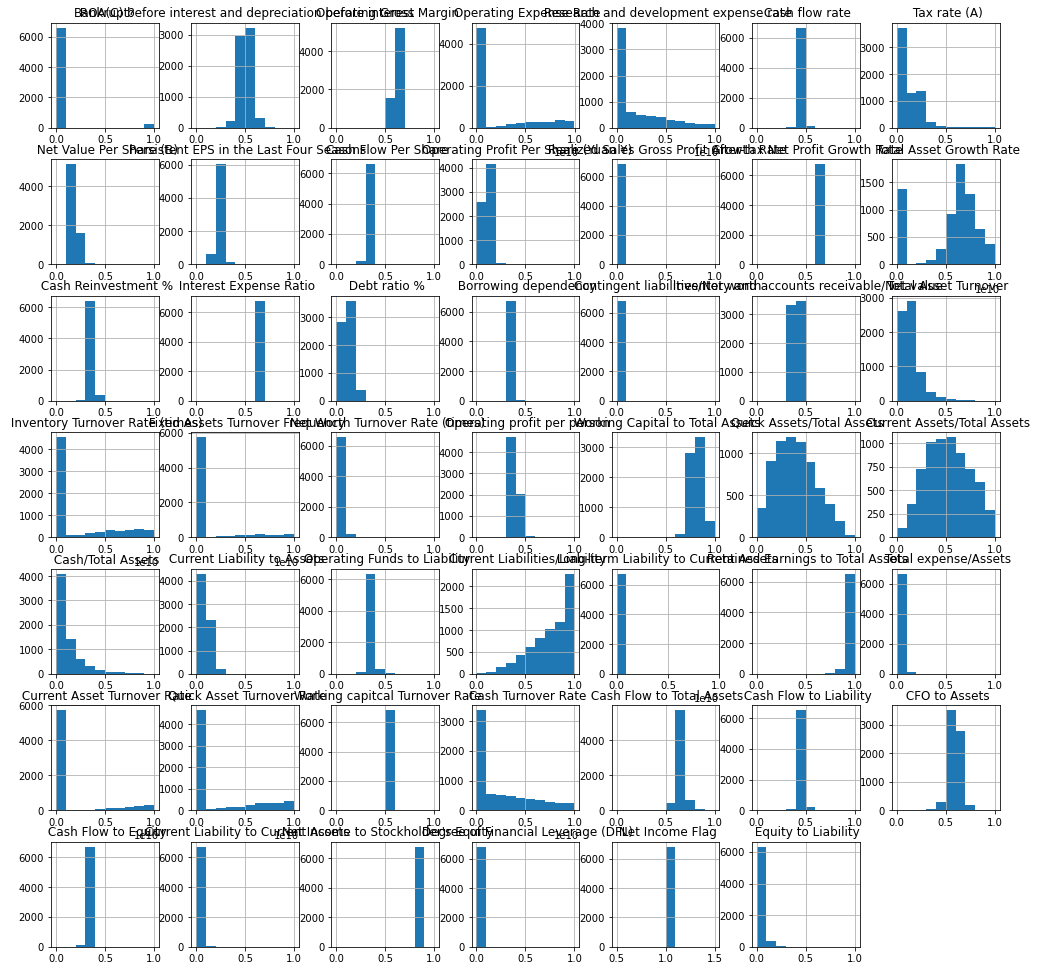

In [128]:
df.hist(figsize=(17,17))

In [102]:
#selecting features for  transformation
feat_to_stand = df[' Operating Expense Rate']

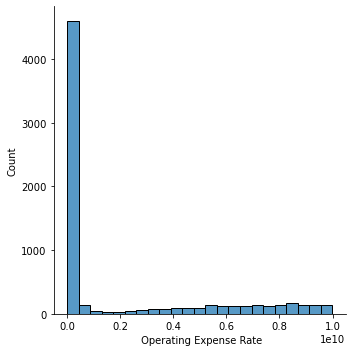

In [110]:
sns.displot(feat_to_stand)

In [ ]:
#powertransform
'''
pt = PowerTransformer()
feat_to_stand_transformed=pt.fit_transform(feat_to_stand.to_numpy().reshape(-1,1))
sns.displot(feat_to_stand_transformed)
'''

In [143]:
#MinMax
"""
scaler = MinMaxScaler()
df[feat_to_stand] = scaler.fit_transform(df[feat_to_stand])
df[feat_to_stand]
"""
'''
scaler = MinMaxScaler()
df[feat_to_stand] = scaler.fit_transform(df[feat_to_stand])
df[feat_to_stand]
'''

'\nscaler = MinMaxScaler()\ndf[feat_to_stand] = scaler.fit_transform(df[feat_to_stand])\ndf[feat_to_stand]\n'

In [89]:
#creating 2 df's for modelling

X=df.drop('Bankrupt?', axis=1)
y=df['Bankrupt?']

In [90]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [111]:
y.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [113]:
#Смотим все данные и трейн и тест и на них накладываем rf
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [114]:
#пробуем смот только на трейн значениях, а тест берем из источника

#ниже мы берем только исходные данные без смота и юзаем rf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [115]:
y.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [116]:
confusion_matrix(y_test, y_pred)

array([[1315,    5],
       [  36,    8]], dtype=int64)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.62      0.18      0.28        44

    accuracy                           0.97      1364
   macro avg       0.79      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364



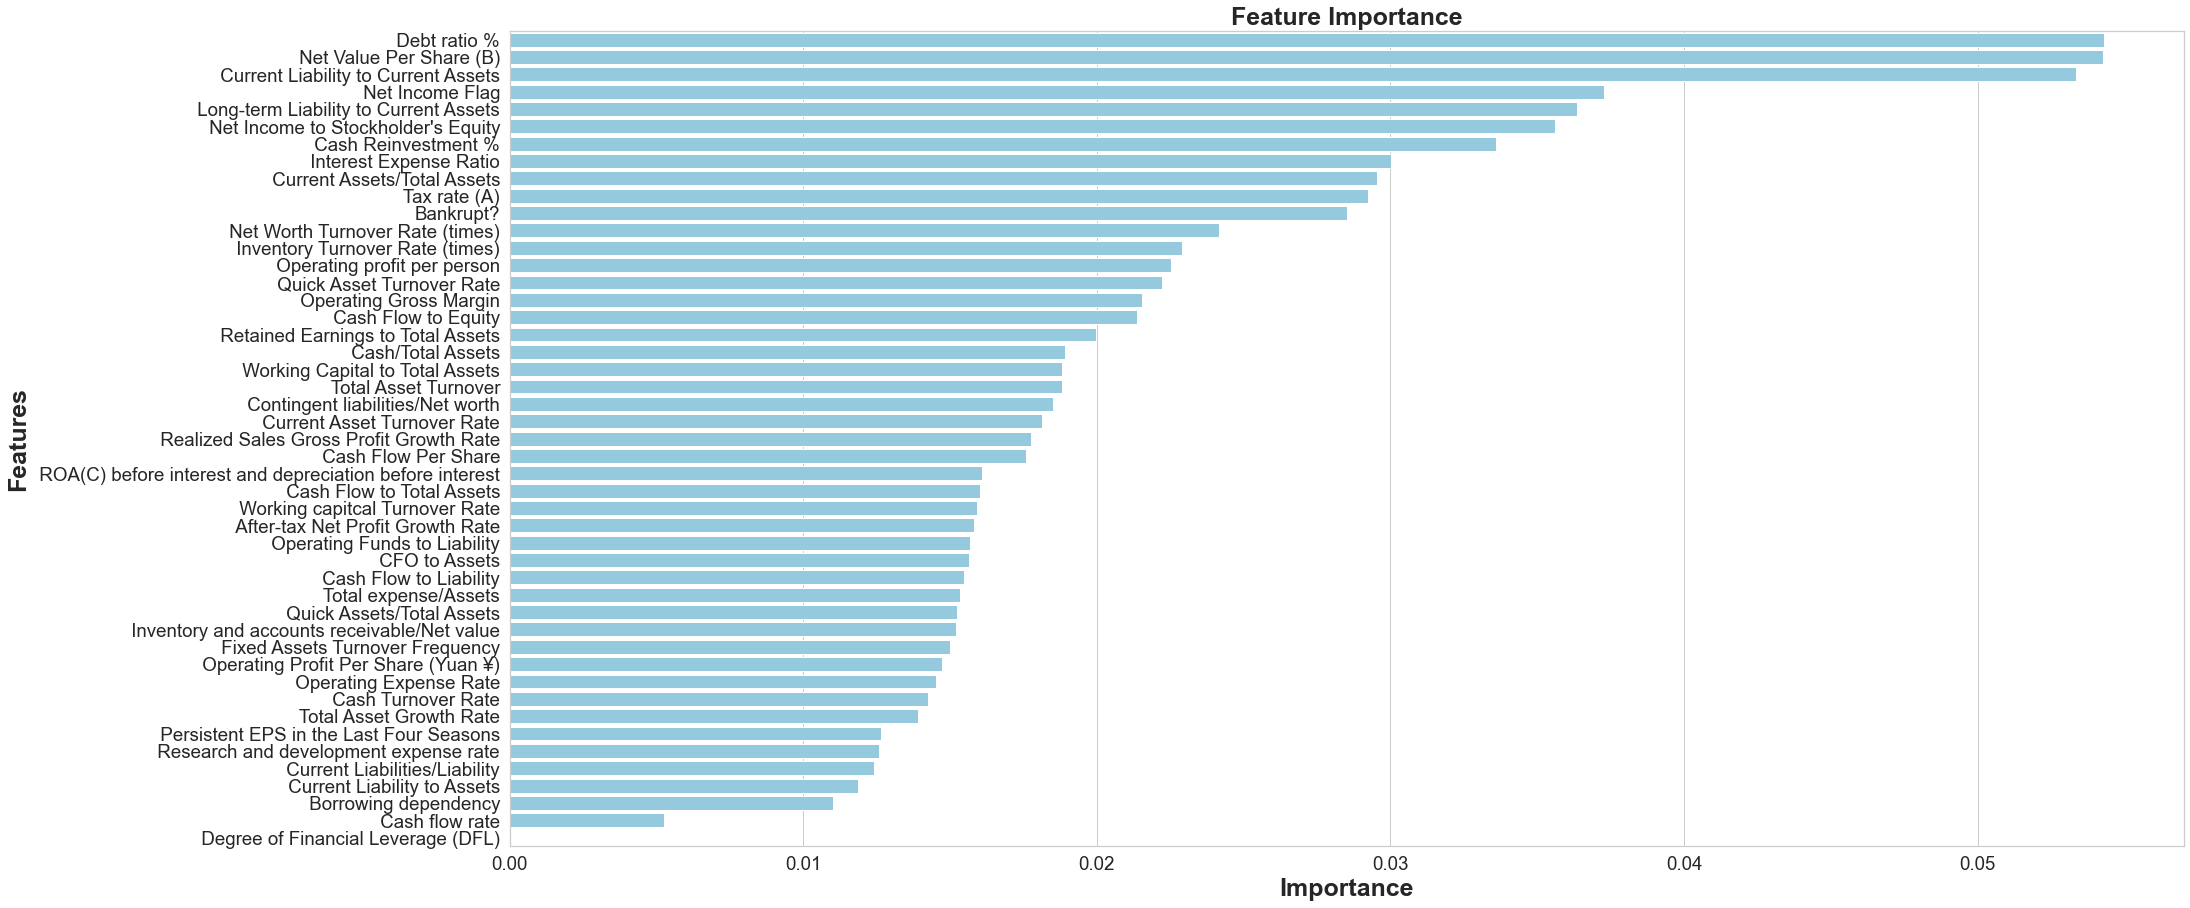

None

,Features,Gini-Importance
0,Debt ratio %,0.054298
1,Net Value Per Share (B),0.054273
2,Current Liability to Current Assets,0.053352
3,Net Income Flag,0.037285
4,Long-term Liability to Current Assets,0.036341
5,Net Income to Stockholder's Equity,0.035616
6,Cash Reinvestment %,0.033580
7,Interest Expense Ratio,0.030023
8,Current Assets/Total Assets,0.029532
9,Tax rate (A),0.029245


In [118]:
feats = {}
for feature, importance in zip(df.columns, rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


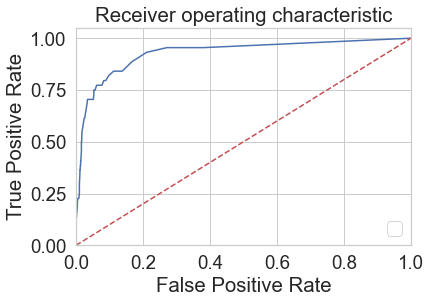

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [76]:
#DONT WORK WITH FOREST
import statsmodels.api as sm
logit_model=sm.Logit(y_res,X_res)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.244859
         Iterations: 35
                                                     Results: Logit
Model:                                 Logit                               Pseudo R-squared:                    0.647    
Dependent Variable:                    Bankrupt?                           AIC:                                 6557.2936
Date:                                  2022-11-16 14:41                    BIC:                                 6909.2212
No. Observations:                      13198                               Log-Likelihood:                      -3231.6  
Df Model:                              46                                  LL-Null:                             -9148.2  
Df Residuals:                          13151                               LLR p-value:                         0.0000   
Converged:                             0.0000                              Scale:                               1.0000   
No. Iteratio

C:\Users\Andrew R\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
X.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share',
       ' Realized Sales Gross Profit Growth Rate',
       ' After-tax Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Cash Reinvestment %', ' Interest Expense Ratio', ' Debt ratio %',
       ' Contingent liabilities/Net worth', ' Total Asset Turnover',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Operating profit per person',
       ' Quick Assets/Total Assets', ' Cash/Total Assets',
       ' Operating Funds to Liability', ' Current Liabilities/Liability',
       ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total expense/Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Tu

In [47]:
cols_with_otp = [' ROA(C) before interest and depreciation before interest',
       ' Operating Gross Margin', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Tax rate (A)', ' Net Value Per Share (B)',
       ' Cash Flow Per Share',
       ' Realized Sales Gross Profit Growth Rate',
       ' After-tax Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Cash Reinvestment %', ' Interest Expense Ratio', ' Debt ratio %',
       ' Contingent liabilities/Net worth',
       ' Total Asset Turnover',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Operating profit per person',
       ' Quick Assets/Total Assets', ' Cash/Total Assets',
       ' Operating Funds to Liability', ' Current Liabilities/Liability',
       ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Total expense/Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Working capitcal Turnover Rate', ' Cash Turnover Rate',
       ' Cash Flow to Total Assets', ' Cash Flow to Liability',
       ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets',
       " Net Income to Stockholder's Equity",
       ' Degree of Financial Leverage (DFL)', ' Equity to Liability']


X=df[cols_with_otp]
y=df['Bankrupt?']


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [78]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1471  454]
 [1220  815]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1925
           1       0.64      0.40      0.49      2035

    accuracy                           0.58      3960
   macro avg       0.59      0.58      0.57      3960
weighted avg       0.60      0.58      0.56      3960



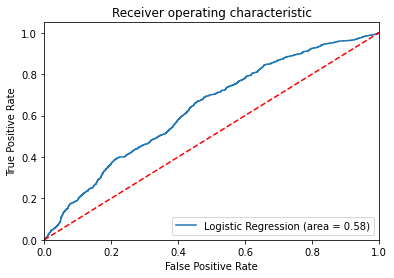

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
'''
os = SMOTE(random_state=42, k_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
columns = X_train.columns

os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['Bankrupt?'])
# Мы можем проверить числа наших данных
print("length of oversampled data is ",len(os_data_X))
print("Number of no bunkr in oversampled data",len(os_data_y[os_data_y['Bankrupt?']==0]))
print("Number of bunkr",len(os_data_y[os_data_y['Bankrupt?']==1]))
print("Proportion of no bunkr data in oversampled data is ",len(os_data_y[os_data_y['Bankrupt?']==0])/len(os_data_X))
print("Proportion of bunkr data in oversampled data is ",len(os_data_y[os_data_y['Bankrupt?']==1])/len(os_data_X))
'''

'\nos = SMOTE(random_state=42, k_neighbors=5)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\ncolumns = X_train.columns\n\nos_data_X, os_data_y=os.fit_resample(X_train, y_train)\nos_data_X = pd.DataFrame(data=os_data_X,columns=columns )\nos_data_y = pd.DataFrame(data=os_data_y,columns=[\'Bankrupt?\'])\n# Мы можем проверить числа наших данных\nprint("length of oversampled data is ",len(os_data_X))\nprint("Number of no bunkr in oversampled data",len(os_data_y[os_data_y[\'Bankrupt?\']==0]))\nprint("Number of bunkr",len(os_data_y[os_data_y[\'Bankrupt?\']==1]))\nprint("Proportion of no bunkr data in oversampled data is ",len(os_data_y[os_data_y[\'Bankrupt?\']==0])/len(os_data_X))\nprint("Proportion of bunkr data in oversampled data is ",len(os_data_y[os_data_y[\'Bankrupt?\']==1])/len(os_data_X))\n'

In [29]:
'''
data_final_vars=df.columns.values.tolist()
y=['Bankrupt?']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
'''

"\ndata_final_vars=df.columns.values.tolist()\ny=['Bankrupt?']\nX=[i for i in data_final_vars if i not in y]\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\nlogreg = LogisticRegression()\nrfe = RFE(logreg)\nrfe = rfe.fit(os_data_X, os_data_y.values.ravel())\nprint(rfe.support_)\nprint(rfe.ranking_)\n"

In [186]:

'''
col=['Operating Gross Margin',
     'Operating Expense Rate',
     'Research and development expense rate',
     'Tax rate (A)', 'Total Asset Growth Rate',
     'Debt ratio %', 
     'Inventory and accounts receivable/Net value', 
     'Inventory Turnover Rate (times)', 
     'Fixed Assets Turnover Frequency', 
     'Current Assets/Total Assets', 
     ' Cash/Total Assets', 
     ' Current Liability to Assets'
    ]

os_data_X.columns
 

boolencolm = rfe.support_
os_data_X.loc[:, boolencolm]
cols_to = os_data_X.loc[:, boolencolm]
cols = cols_to.columns
cols


X=os_data_X[cols]
y=os_data_y['Bankrupt?']
'''

In [202]:
'''
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
'''

         Current function value: 0.084321
         Iterations: 35
                                                     Results: Logit
Model:                                Logit                              Pseudo R-squared:                   0.408      
Dependent Variable:                   Bankrupt?                          AIC:                                1243.9692  
Date:                                 2022-11-15 18:49                   BIC:                                1564.8602  
No. Observations:                     6819                               Log-Likelihood:                     -574.98    
Df Model:                             46                                 LL-Null:                            -971.86    
Df Residuals:                         6772                               LLR p-value:                        6.0906e-137
Converged:                            0.0000                             Scale:                              1.0000     
No. Iterations:    

C:\Users\Andrew R\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
#X.columns

In [31]:
'''
cols_with_otp = [' ROA(C) before interest and depreciation before interest',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Tax rate (A)', ' After-tax Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Interest Expense Ratio', ' Debt ratio %',
       ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency', ' Quick Assets/Total Assets',
       ' Cash/Total Assets', ' Current Liability to Assets',
       ' Current Liabilities/Liability',
       ' Long-term Liability to Current Assets',
       ' Retained Earnings to Total Assets', ' Current Asset Turnover Rate',
       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',
       ' Cash Turnover Rate']


X=os_data_X[cols_with_otp]
y=os_data_y['Bankrupt?']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
'''

"\ncols_with_otp = [' ROA(C) before interest and depreciation before interest',\n       ' Operating Expense Rate', ' Research and development expense rate',\n       ' Tax rate (A)', ' After-tax Net Profit Growth Rate',\n       ' Total Asset Growth Rate', ' Interest Expense Ratio', ' Debt ratio %',\n       ' Inventory Turnover Rate (times)',\n       ' Fixed Assets Turnover Frequency', ' Quick Assets/Total Assets',\n       ' Cash/Total Assets', ' Current Liability to Assets',\n       ' Current Liabilities/Liability',\n       ' Long-term Liability to Current Assets',\n       ' Retained Earnings to Total Assets', ' Current Asset Turnover Rate',\n       ' Quick Asset Turnover Rate', ' Working capitcal Turnover Rate',\n       ' Cash Turnover Rate']\n\n\nX=os_data_X[cols_with_otp]\ny=os_data_y['Bankrupt?']\n\nlogit_model=sm.Logit(y,X)\nresult=logit_model.fit()\nprint(result.summary2())\n"

In [188]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
'''

LogisticRegression()

In [189]:
#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.57


In [190]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

[[1178  400]
 [ 965  629]]


In [191]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63      1578
           1       0.61      0.39      0.48      1594

    accuracy                           0.57      3172
   macro avg       0.58      0.57      0.56      3172
weighted avg       0.58      0.57      0.56      3172



In [32]:
'''
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
'''

'\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import roc_curve\nlogit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))\nfpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])\nplt.figure()\nplt.plot(fpr, tpr, label=\'Logistic Regression (area = %0.2f)\' % logit_roc_auc)\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic\')\nplt.legend(loc="lower right")\nplt.savefig(\'Log_ROC\')\nplt.show()\n'